## Calculate dice score

In [8]:
import SimpleITK as sitk
import numpy  as np

In [9]:
def DICE(turelabel, result):
    intersection=np.sum(np.minimum(np.equal(turelabel,result),turelabel))
    union = np.count_nonzero(turelabel)+np.count_nonzero(result)
    dice = 2 * intersection / union
    return dice

def averagenum(num):
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

In [12]:
##faster
num_arry=['000','001','002','003','004',"005","006"]
whole_dice=[]
kidney_dice = []
cancer_dice = []

#image_arry_kid = []
#result_kid = []
#image_arry_can = []
#result_can = []

for num in range(30):
    a = str(num).zfill(3)
    labelpath=r"E:\kits19\data\case_00{}\segmentation.nii.gz".format(a)
    resultpath=r"C:\Users\VMLAB\Desktop\kidney\segmentedData\final_case00{}.mha".format(a)
    
    image=sitk.ReadImage(labelpath)
    result=sitk.ReadImage(resultpath)
    image_arry = sitk.GetArrayFromImage(image)
    result_arry = sitk.GetArrayFromImage(result)
    
    whole_dice.append(DICE(image_arry,result_arry))
    
    image_arry_kid = np.where(image_arry==1,1,0)
    image_arry_can = np.where(image_arry==2,2,0)
    
    result_kid = np.where(result_arry==1,1,0)
    result_can = np.where(result_arry==2,2,0)

    kidney_dice.append(DICE(image_arry_kid,result_kid))
    cancer_dice.append(DICE(image_arry_can,result_can))
    
#print(wholedice)
print("average whole:",averagenum(whole_dice))
print("every whole")
print(whole_dice)
print("average kidney: ",averagenum(kidney_dice))
print("every kidney")
print(kidney_dice)
print("average cancer: ",averagenum(cancer_dice))
print("every cancer")
print(cancer_dice)

average whole: 0.9127486487642922
every whole
[0.9690794715484815, 0.927126156623787, 0.9163230481496596, 0.9682067061858003, 0.9651696286871205, 0.7741821237227036, 0.9490473946557262, 0.9417119318556076, 0.8322598892483576, 0.95985075974803, 0.9351281982858377, 0.8753530207252257, 0.8676468034522116, 0.9457700526158583, 0.9738564840862126, 0.5946822738046371, 0.9696399680738615, 0.9693487248691347, 0.9463754002358892, 0.976360180362942, 0.9684277281613746, 0.9461248121953901, 0.9593044719244215, 0.96830889400914, 0.935477184809711, 0.9329992807287544, 0.881188740586158, 0.9678784389044971, 0.6607619391485658, 0.9048697555236696]
average kidney:  0.9311015229674968
every kidney
[0.9775884527371942, 0.9575302822364102, 0.9413290349165566, 0.9767267636365339, 0.9717484456824741, 0.8269687349337311, 0.9630409556838049, 0.9614290781073483, 0.795657109990836, 0.9688718418309462, 0.9523688041178324, 0.9187346498143591, 0.9090498840221306, 0.9613404168369432, 0.9789059196617336, 0.5937428599

In [88]:
##slower
num_arry=['000','001','002','003','004',"005","006"]
whole_dice=[]
kidney_dice = []
cancer_dice = []

image_arry_kid = []
result_kid = []
image_arry_can = []
result_can = []

for num in num_arry:
    labelpath=r"E:\kits19\data\case_00{}\segmentation.nii.gz".format(num)
    resultpath=r"C:\Users\VMLAB\Desktop\kidney\segmentedData\final_case_00{}.mha".format(num)
    image=sitk.ReadImage(labelpath)
    result=sitk.ReadImage(resultpath)
    #whole
    image_arry = sitk.GetArrayFromImage(image)
    result_arry = sitk.GetArrayFromImage(result)
    whole_dice.append(DICE(image_arry,result_arry))
    
    for (images,results) in zip(image_arry,result_array):
        for l1,m1 in zip(images,results):
            for l,m in zip(l1,m1):
                if l == 1:
                    image_arry_kid.append(l)
                else:
                    image_arry_kid.append(0)

                if l == 2:
                    image_arry_can.append(2)
                else:
                    iamge_arry_can.append(0)

                if m == 1:
                    result_kid.append(l)
                else:
                    result_kid.append(0)

                if m == 1:
                    result_can.append(2)
                else:
                    result_can.append(0)


    kidney_dice.append(DICE(image_arry_kid,result_kid))
    cancer_dice.append(DICE(image_arry_can,result_can))
    
#print(wholedice)
print("average whole:",averagenum(whole_dice))
print("every whole")
print(whole_dice)
print("average kidney: ",averagenum(kidney_dice))
print("every kidney")
print(kidney_dice)
print("average cancer: ",averagenum(cancer_dice))
print("every cancer")
print(cancer_dice)

RuntimeError: Exception thrown in SimpleITK ReadImage: /scratch/dashboard/SimpleITK-OSX10.6-x86_64-pkg/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "C:\Users\VMLAB\Desktop\kidney\kits19\data\case_00000\segmentation.nii.gz" does not exist.

## Result 

average whole: 0.8630059891064075

every whole

[0.9591196067875296, 0.9520993383239303, 0.8467956040743501, 0.9601632634342647, 0.9056905448290898, 0.4647860972799211, 0.9523874690157663]

average kidney:  0.9470405045689381

every kidney

[0.9780640254771015, 0.9723550184214887, 0.9539591541870345, 0.9581546771583904, 0.9545758310738587, 0.9016873078551152, 0.9104875178095769]

average cancer:  0.14326236188385308

every cancer

[0.0, 0.01055656559732567, 0.14334679887379115, 0.14086105719571854, 0.16740243999539958, 0.272494556352483, 0.2681751151722535]

## Result with weight decay

average whole: 0.8508269859383292

every whole

[0.9570119057741051, 0.9193649923248561, 0.8647152845515127, 0.9466173537418437, 0.9179154604735212, 0.40666278392545135, 0.9435011207770142]

average kidney:  0.8612331243462235

every kidney

[0.9707636726283999, 0.9359023560800674, 0.8967651445209858, 0.9721365828253096, 0.9455070781498398, 0.352027851971423, 0.9555291842475386]

average cancer:  0.3300786053137735

every cancer

[0.3729897113175507, 0.0, 0.47862260720778527, 0.4145620243346745, 0.46762071450633175, 0.5767551798300717, 0.0]

## penalty_categorical

In [7]:
import tensorflow as tf

array_tf = tf.convert_to_tensor(a,dtype=tf.float32)

result = tf.reduce_sum(array_tf,[0,1,2])
result2 = tf.reduce_sum(a.sum(0),0)
result3 = tf.reduce_sum(result2,0)
result_pow = tf.pow(result3,1.0/3)

sess = tf.Session()
print(sess.run(result_pow))
result_pow = tf.pow(result,1.0/3)
weight_y = result_pow / tf.reduce_sum(result_pow)
print(sess.run(1/weight_y))
print(sess.run(result))


[[       nan        nan        nan]
 [       nan        nan 0.98497314]
 [       nan        nan 0.80284354]
 [1.47772347        nan        nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[-2.2062957  -0.28657302 -4.168716  ]
 [-0.4040414  -0.8846217   0.9555932 ]
 [-2.452169   -1.2380549   0.517479  ]
 [ 3.2268555  -1.5685507  -1.0826172 ]]


## Plot

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
whole_org =  [0.9591196067875296, 0.9520993383239303, 0.8467956040743501, 0.9601632634342647, 0.9056905448290898, 0.4647860972799211, 0.9523874690157663]
kid_org = [0.9780640254771015, 0.9723550184214887, 0.9539591541870345, 0.9581546771583904, 0.9545758310738587, 0.9016873078551152, 0.9104875178095769]
can_org = [0.0, 0.01055656559732567, 0.14334679887379115, 0.14086105719571854, 0.16740243999539958, 0.272494556352483, 0.2681751151722535]
whole_weight = [0.9570119057741051, 0.9193649923248561, 0.8647152845515127, 0.9466173537418437, 0.9179154604735212, 0.40666278392545135, 0.9435011207770142]
kid_weight = [0.9707636726283999, 0.9359023560800674, 0.8967651445209858, 0.9721365828253096, 0.9455070781498398, 0.352027851971423, 0.9555291842475386]
can_weight = [0.3729897113175507, 0.0, 0.47862260720778527, 0.4145620243346745, 0.46762071450633175, 0.5767551798300717, 0.0]

## Original result

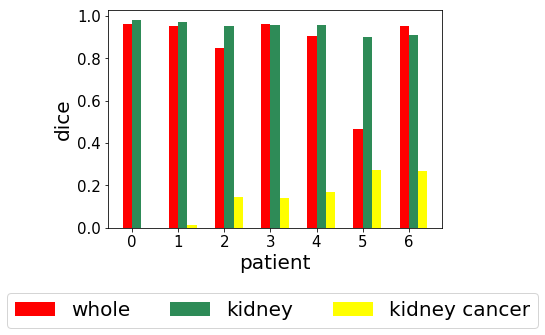

In [104]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
plt.bar(left, whole_org, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_org,width=width, color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_org,width=width, color="yellow", align="center",label="kidney cancer")
plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Result with weight decay

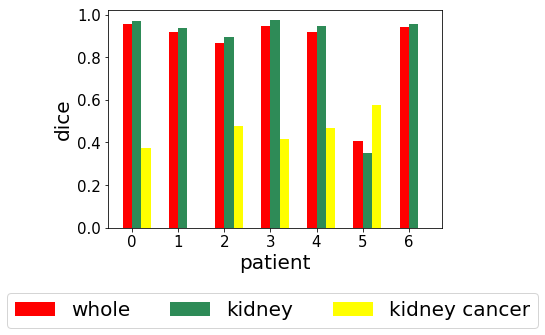

In [105]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
plt.bar(left, whole_weight, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_weight,width=width, color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_weight,width=width, color="yellow", align="center",label="kidney cancer")
plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Marge result

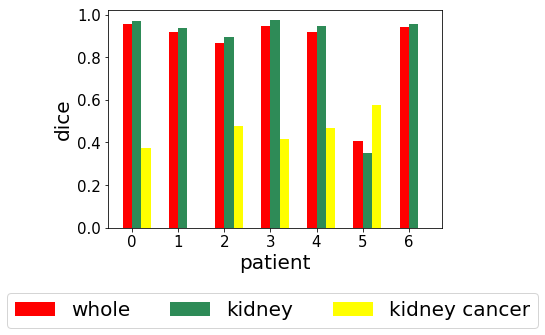

In [106]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="whole",alpha=0.3)
#plt.bar(left+width,kid_org,width=width,color="b", align="center",label="kidney",alpha=0.4)
#plt.bar(left+width+width,can_org,width=width,color="y", align="center",label="kidney cancer",alpha=0.5)

plt.bar(left, whole_weight, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_weight,width=width,color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_weight,width=width,color="yellow", align="center",label="kidney cancer")

plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Compare orginal result with result with weight decay

## Kidney

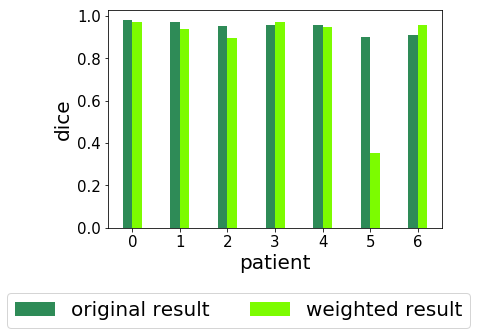

In [101]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="original result")
plt.bar(left,kid_org,width=width,color="seagreen", align="center",label="original result")
#plt.bar(left,can_org,width=width,color="r", align="center",label="original result")

#plt.bar(left+width, whole_weight, color="b",width=width, align="center",label="weighted result")
plt.bar(left+width,kid_weight,width=width,color="lawngreen", align="center",label="weighted result")
#plt.bar(left+width,can_weight,width=width,color='b', align="center",label="weighted result")

plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
#plt.yticks(y)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Kidney cancer

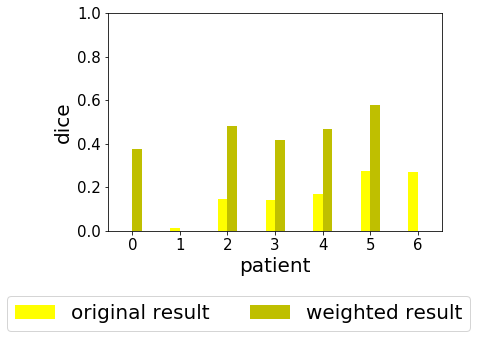

In [103]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y = [0.0,0.2,0.4,0.6,0.8,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="original result")
#plt.bar(left,kid_org,width=width,color="r", align="center",label="original result")
plt.bar(left,can_org,width=width,color="yellow", align="center",label="original result")

#plt.bar(left+width, whole_weight, color="b",width=width, align="center",label="weighted result")
#plt.bar(left+width,kid_weight,width=width,color="b", align="center",label="weighted result")
plt.bar(left+width,can_weight,width=width,color='y', align="center",label="weighted result")

plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.yticks(y)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

##  From kidney and cancer to only kidney